In [1]:
import numpy as np
import pandas as pd
df = pd.read_csv('spam.csv' , encoding='latin1')
df.head()
df.info()
        #DATA CLEANING
#drop last 3 col
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)
df.info()

#renaming column
df.rename(columns={'v1':'target','v2':'text'},inplace=True)
df.sample(5)

#char -> number using label encoder
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['target'] = encoder.fit_transform(df['target'])
df.head()

#check for missing values
df.isnull().sum()

#check fo rduplicate values
df.duplicated().sum()
df = df.drop_duplicates(keep='first')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [2]:
df.shape

(5169, 2)

2. EDA - exploratory data analysis
check how much %is spam and ham
ham -> 0 , spam -> 1


In [3]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

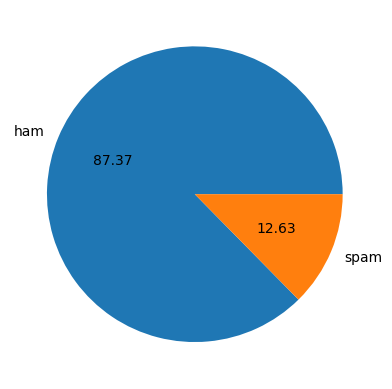

In [4]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), labels=['ham','spam'], autopct="%0.2f")
plt.show()

what we analysed?
1. calculated % of ham and spam-> ham >>> spam. data is imbalanced

next we make 3 columns(3 new features)
c1 -> no. of char
c2 -> no. of words
c3 -> no. of sentences. 
for that we need nltk lib

In [7]:
import nltk
nltk.download('punkt')
nltk.download('punkt_tab')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt_tab.zip.


True

In [ ]:
#num of chars
df['num_char'] = df['text'].apply(len)
df.head()

#num of words
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))
df.head()

#num of sentences
df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))
df.head()

#describe is used to see mean,std,count
df[['num_char','num_words','num_sentences']].describe()

,num_char,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


lets analyse the columns of ham and spam separately

In [ ]:
#for ham msgs (target = 0(ham))
df[df['target'] == 0][['num_char','num_words','num_sentences']].describe()

,num_char,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [14]:
#target = 1(spam)
df[df['target'] == 1][['num_char','num_words','num_sentences']].describe()

,num_char,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


clearly, if we see mean of both ham and spam. spam msgs are longer than ham
spam has 137 char per sentences and ham-> 70 char per sentence

In [17]:
#plot histogram
import seaborn as sns

<Axes: xlabel='num_char', ylabel='Count'>

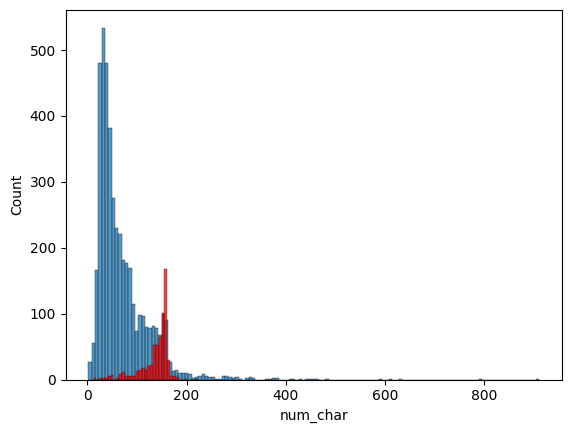

In [20]:
sns.histplot(df[df['target'] == 0]['num_char'])
sns.histplot(df[df['target'] == 1]['num_char'],color='red')

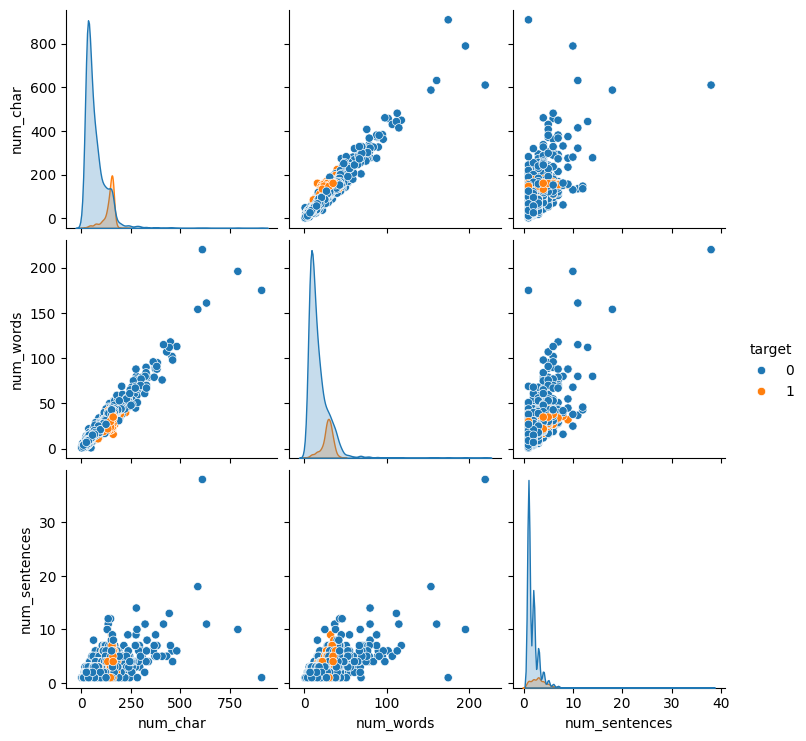

In [21]:
sns.pairplot(df,hue='target')

there are visible outliers, which can hamper model

<Axes: >

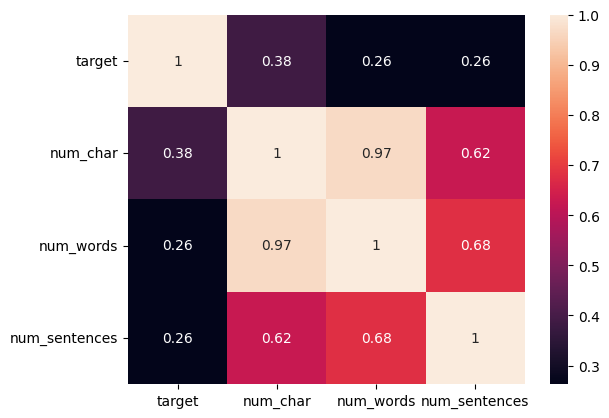

In [23]:
sns.heatmap(df.select_dtypes(include='number').corr(),annot=True)

heatmap tells us how to decide which numeric text-based feature is best for spam detection.
target vs num_char = 0.38  (strongest). -> Messages with more characters are more likely to be spam(target = 1).
Which feature should you choose? ->num_char as it has Highest correlation with target

3. data preprocessing
lower case, tokenization, removing special char, removing stop words(ex-> is, of, the,by) and punctuation, stemming(convert same tpe of word into single word ex-> dance, dancing, dances to 'dance')

create a nw single func to perform all these step 